# Hierarchical Clustering

In [12]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [13]:
# Define possible dataset paths.
paths = [
    '../datasets/_integrated_data/dropped-column-if-missing-value/data.csv',                            # 0   - Annual  : Dropped column if missing value
    '../datasets/_integrated_data/dropped-column-if-missing-value/data-gendered.csv',                   # 1   - Annual  : Dropped column if missing value         - Gendered
    '../datasets/_integrated_data/dropped-row-if-missing-value/data.csv',                               # 2   - Annual  : Dropped row if missing value
    '../datasets/_integrated_data/dropped-row-if-missing-value/data-gendered.csv',                      # 3   - Annual  : Dropped row if missing value            - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data.csv',                             # X4  - Annual  : Missing pollutant values as NA
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data-gendered.csv',                    # X5  - Annual  : Missing pollutant values as NA          - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data.csv',                            # X6  - Annual  : Missing pollutant values as NaN
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data-gendered.csv',                   # X7  - Annual  : Missing pollutant values as NaN         - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data.csv',                    # 8   - Annual  : Missing pollutant values filled somehow
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data-gendered.csv',           # 9   - Annual  : Missing pollutant values filled somehow - Gendered
    '../datasets/_integrated_data/monthly/dropped-column-if-missing-value/data.csv',                    # 10  - Monthly : Dropped column if missing value
    '../datasets/_integrated_data/monthly/dropped-column-if-missing-value/data-gendered.csv',           # 11  - Monthly : Dropped column if missing value         - Gendered
    '../datasets/_integrated_data/monthly/dropped-row-if-missing-value/data.csv',                       # 12  - Monthly : Dropped row if missing value
    '../datasets/_integrated_data/monthly/dropped-row-if-missing-value/data-gendered.csv',              # 13  - Monthly : Dropped row if missing value            - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NA/data.csv',                     # X14 - Monthly : Missing pollutant values as NA
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NA/data-gendered.csv',            # X15 - Monthly : Missing pollutant values as NA          - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NaN/data.csv',                    # X16 - Monthly : Missing pollutant values as NaN
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NaN/data-gendered.csv',           # X17 - Monthly : Missing pollutant values as NaN         - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-filled-somehow/data.csv',            # 18  - Monthly : Missing pollutant values filled somehow
    '../datasets/_integrated_data/monthly/missing-pollutant-values-filled-somehow/data-gendered.csv'    # 19  - Monthly : Missing pollutant values filled somehow - Gendered
]

# Choose a dataset.
chosen_dataset = 18

# Load the data
df = pd.read_csv(paths[chosen_dataset])

# Count of number of pollutant features in the dataset
column_list = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']
n_pollutants = sum([1 for col in df.columns if col in column_list])

# Extract pollutant columns and columns after the pollutants
pollutant_columns = [col for col in df.columns if col in column_list]
health_stat_columns = df.iloc[:, df.columns.get_loc(pollutant_columns[-1]) + 1:]

# Standardize the pollutant columns
scaler = StandardScaler()
scaled_pollutants = scaler.fit_transform(df[pollutant_columns])

# Scale the standardized values to range [0, 1]
min_val = scaled_pollutants.min(axis=0)
max_val = scaled_pollutants.max(axis=0)
scaled_pollutants = (scaled_pollutants - min_val) / (max_val - min_val)

# Show the dataset
print(f"Pollutatnt columns: {pollutant_columns}")
print(f"Dataset shape: {df.shape}")
print(f"Number of pollutant features: {n_pollutants}")
df.describe()

Pollutatnt columns: ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']
Dataset shape: (1560, 9)
Number of pollutant features: 6


,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm,asthma edp
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,0.133039,0.547513,0.585202,1.854216,18.511935,0.068814,30.154487
std,0.076290,0.732098,0.374287,0.431311,4.919421,0.047696,13.902653
min,0.000000,0.000000,0.000000,0.623026,8.095566,0.000000,3.600000
25%,0.100000,0.136131,0.302769,1.550000,15.605194,0.033193,20.100000
50%,0.133039,0.275000,0.484458,1.850000,18.511935,0.068814,28.000000
75%,0.193861,0.575000,0.755558,2.150000,19.680863,0.100000,38.300000
max,0.456505,4.576080,2.072091,3.213516,45.265611,0.252773,91.700000


Optimal number of clusters: 4
Silhouette score: 0.20814452576371198


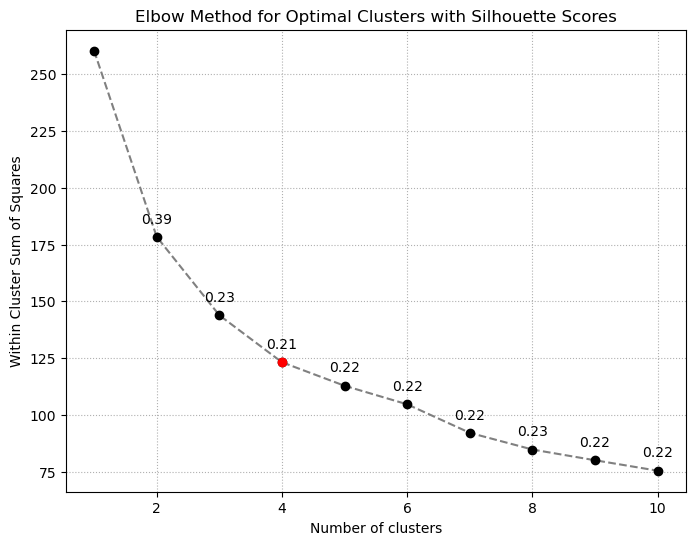

In [14]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_pollutants)
    wcss.append(kmeans.inertia_)

# Calculate the silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=808)
    cluster_labels = kmeans.fit_predict(scaled_pollutants)
    silhouette_avg = silhouette_score(scaled_pollutants, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, '--', color='grey')
plt.scatter(range(1, 11), wcss, color='black', zorder=5)
plt.title('Elbow Method for Optimal Clusters with Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.grid(True, linestyle=':')

# Annotate silhouette scores on the elbow method graph
for i, txt in enumerate(silhouette_scores, start=2):
    plt.annotate(f'{txt:.2f}', (i, wcss[i-1]), textcoords="offset points", xytext=(0,10), ha='center')

# Set the optimal number of clusters
threshold = 0.01                                                                                                 # Define a threshold for insignificant change
optimal_clusters = 2                                                                                             # Start with the minimum number of clusters

for i in range(1, len(silhouette_scores)):
    if abs(silhouette_scores[i] - silhouette_scores[i - 1]) < threshold:
        optimal_clusters = i + 1
        break

# Highlight the point with the optimal number of clusters
plt.scatter(optimal_clusters, wcss[optimal_clusters - 1], color='red', zorder=5)

# Show the plot and initial results
print(f'Optimal number of clusters: {optimal_clusters}')
print(f'Silhouette score: {silhouette_scores[optimal_clusters - 2]}')
plt.show()

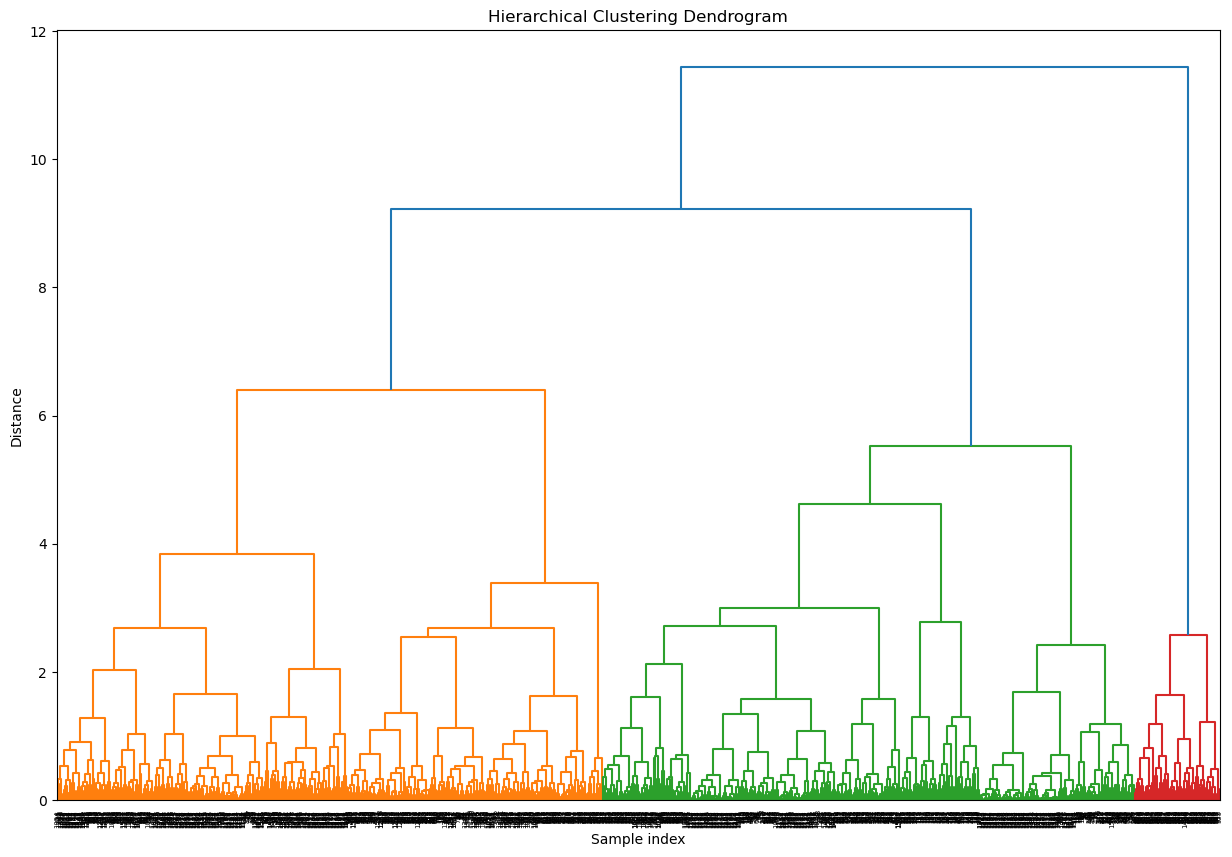

,year-month,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm,asthma edp,Hierarchical Cluster
0,2014-07,Central Coast,0.1,0.5,0.6,1.7,10.6,0.0,26.1,1
1,2014-08,Central Coast,0.1,0.3,0.6,1.9,11.9,0.0,33.4,1
2,2014-09,Central Coast,0.1,0.2,0.6,2.0,12.5,0.0,24.1,1
3,2014-10,Central Coast,0.1,0.2,0.5,2.3,20.0,0.1,24.0,0
4,2014-11,Central Coast,0.1,0.0,0.3,2.4,20.8,0.1,25.0,0


In [15]:

# Perform hierarchical clustering
linked = linkage(scaled_pollutants, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Fit the Agglomerative Clustering model
hierarchical_cluster = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hierarchical_labels = hierarchical_cluster.fit_predict(scaled_pollutants)

# Add the hierarchical cluster labels to the dataframe
df['Hierarchical Cluster'] = hierarchical_labels

# Show the updated dataframe
df.head()